<a href=#graph>Interactive Charts</a>

Main Notebook for Linear Regression and setting up data and images for presentation notebook

# Imports

In [81]:
import project_path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (train_test_split, 
                                     RandomizedSearchCV, 
                                     cross_val_score,
                                     RepeatedStratifiedKFold
                                    )
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.ensemble import (RandomForestRegressor, 
                              RandomForestClassifier
                             )
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             precision_score, 
                             recall_score, 
                             #roc_auc_score, 
                             #roc_curve, 
                             f1_score
                            )
from sklearn.preprocessing import (OneHotEncoder, 
                                   OrdinalEncoder
                                  )
from sklearn.compose import make_column_transformer
from pprint import pprint
from sklearn.pipeline import make_pipeline
from numpy import (mean, 
                   std
                  )
#from numpy import std
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
from scipy.stats import mode as sc_mode
import os
from IPython.display import display, Image 
#from funct import *

pd.set_option('display.max_columns', None)

%matplotlib inline

In [82]:
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf
import chart_studio
import statsmodels.api as sm
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# Variables To Load

In [83]:
skip_run = True
keep_ = ['NAmes', 'OldTown', 'Sawyer', 'BrkSide', 'Mitchel', 'IDOTRR', 'SWISU', 'Edwards']
# features from random forest based on NAmes date
features = ['Neighborhood', 'FullBath', 'OverallQual', 'ExterQual',
            'GarageCars', 'YearBuilt', 'KitchenQual', 'TotRmsAbvGrd', 'GrLivArea',
           'SalePrice']

# Load Data

In [84]:
train_all = pd.read_pickle('data/train_raw.pkl')

In [11]:
train_all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [85]:
x_feat = train_all[features]

In [14]:
x_feat.shape

(1460, 10)

In [15]:
x_feat.describe().round()

,FullBath,OverallQual,GarageCars,YearBuilt,TotRmsAbvGrd,GrLivArea,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,2.0,6.0,2.0,1971.0,7.0,1515.0,180921.0
std,1.0,1.0,1.0,30.0,2.0,525.0,79443.0
min,0.0,1.0,0.0,1872.0,2.0,334.0,34900.0
25%,1.0,5.0,1.0,1954.0,5.0,1130.0,129975.0
50%,2.0,6.0,2.0,1973.0,6.0,1464.0,163000.0
75%,2.0,7.0,2.0,2000.0,7.0,1777.0,214000.0
max,3.0,10.0,4.0,2010.0,14.0,5642.0,755000.0


# Pairplot

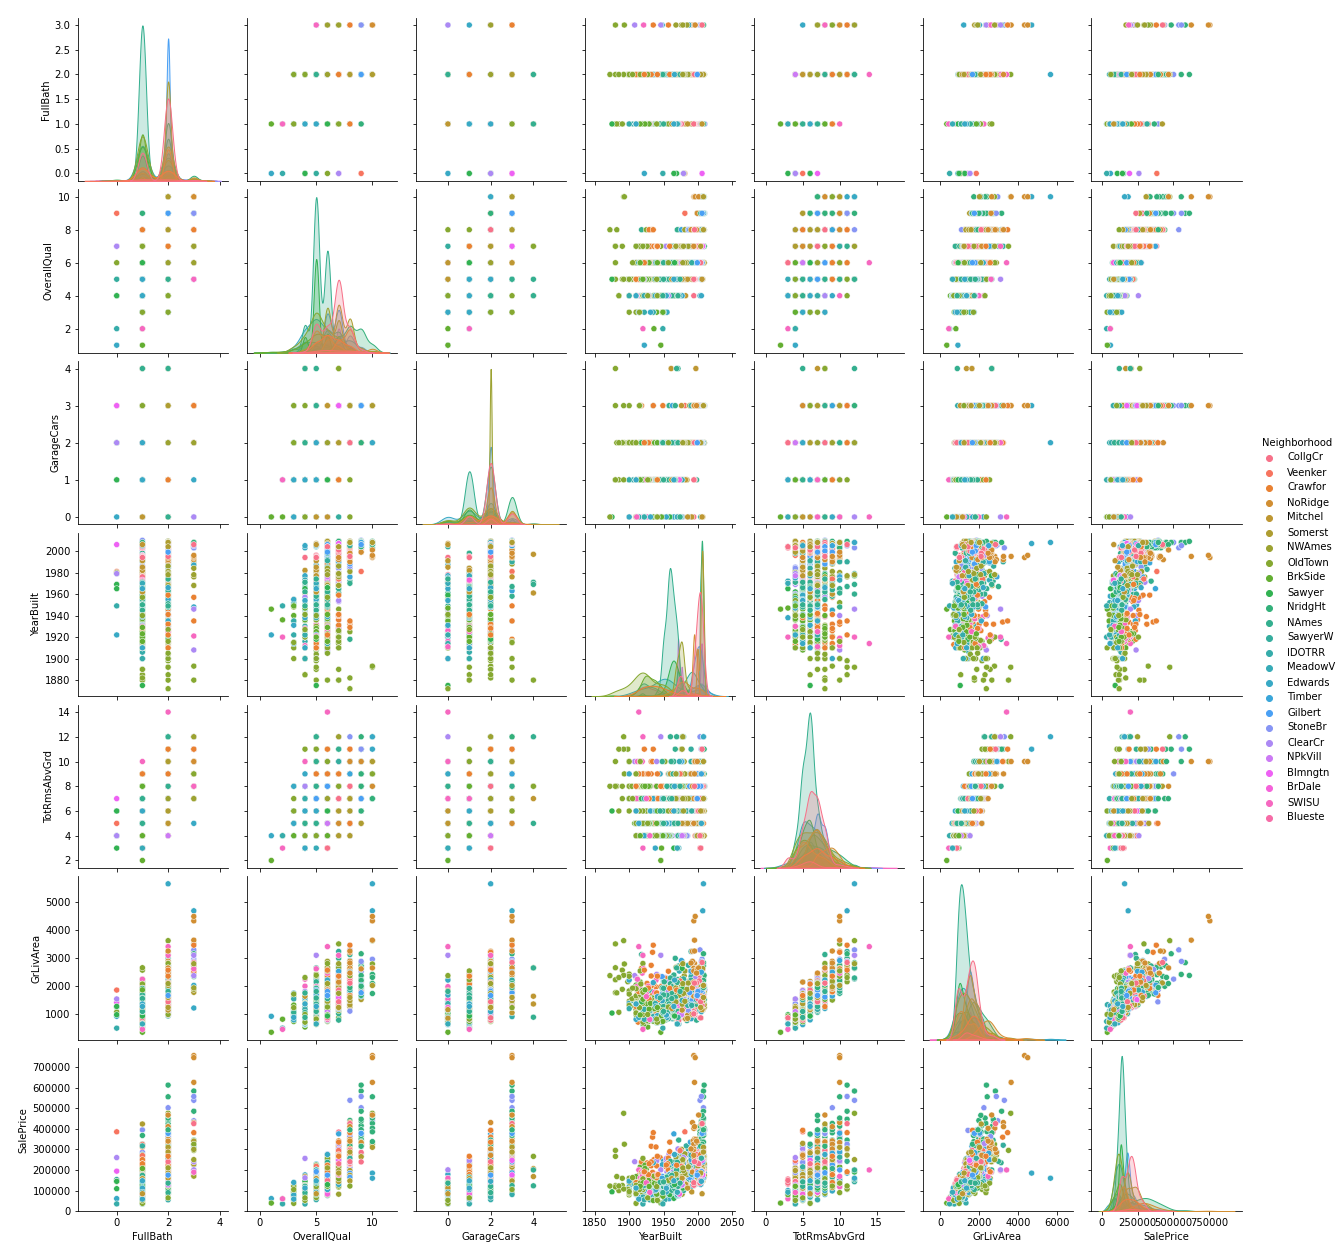

<Figure size 1584x1584 with 0 Axes>

In [57]:
plt.figure(figsize=(22, 22))
if skip_run:
    Image('images/pair_plot_sns.png')
else:
    sns.pairplot(x_feat, hue='Neighborhood')
    plt.savefig('images/pair_plot_sns.png')
Image('images/pair_plot_sns.png')


In [18]:
x_feat.corr()

,FullBath,OverallQual,GarageCars,YearBuilt,TotRmsAbvGrd,GrLivArea,SalePrice
FullBath,1.000000,0.550600,0.469672,0.468271,0.554784,0.630012,0.560664
OverallQual,0.550600,1.000000,0.600671,0.572323,0.427452,0.593007,0.790982
GarageCars,0.469672,0.600671,1.000000,0.537850,0.362289,0.467247,0.640409
YearBuilt,0.468271,0.572323,0.537850,1.000000,0.095589,0.199010,0.522897
TotRmsAbvGrd,0.554784,0.427452,0.362289,0.095589,1.000000,0.825489,0.533723
GrLivArea,0.630012,0.593007,0.467247,0.199010,0.825489,1.000000,0.708624
SalePrice,0.560664,0.790982,0.640409,0.522897,0.533723,0.708624,1.000000


# Corr Heatmap

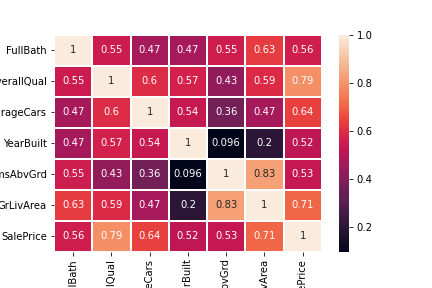

In [59]:
if not skip_run:
    sns.heatmap(x_feat.corr(), annot=True, lw=1)
    plt.savefig('images/feat_corr.png')
    plt.show()
Image('images/feat_corr.png')

# Box plots

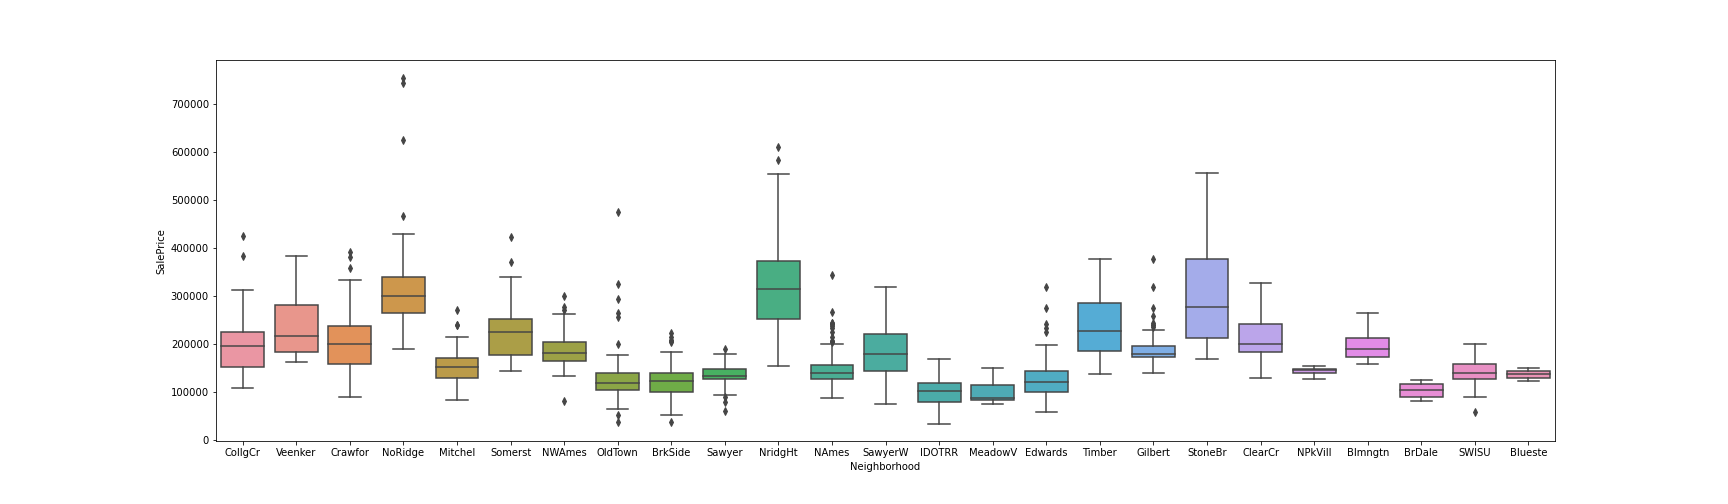

In [69]:
if not skip_run:
    plt.figure(figsize=(24,7))
    sns.boxplot(y='SalePrice', x='Neighborhood', data=x_feat)#
    plt.savefig('images/boxplot_all.png')

Image('images/boxplot_all.png')


# Linear Regression

In [23]:

           
X=x_feat[['Neighborhood', 'FullBath', 'OverallQual', 'ExterQual',
            'GarageCars', 'YearBuilt', 'KitchenQual', 
 'TotRmsAbvGrd', 'GrLivArea']]
X = pd.get_dummies(data=X, drop_first=True)

In [35]:
Y = x_feat['SalePrice']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 36)
(292, 36)
(1168,)
(292,)


In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [39]:
print(model.intercept_)

-505038.36261747073


# Show Coefficients

In [70]:
if skip_run:
    coeff_parameter = pd.read_pickle('data/coeff_parameter.pkl')
else:
    coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
    coeff_parameter.to_pickle('data/coeff_parameter.pkl')
coeff_parameter.round(-1)

,Coefficient
FullBath,490.0
OverallQual,13110.0
GarageCars,12040.0
YearBuilt,290.0
TotRmsAbvGrd,-240.0
GrLivArea,50.0
Neighborhood_Blueste,-26960.0
Neighborhood_BrDale,-26070.0
Neighborhood_BrkSide,11120.0
Neighborhood_ClearCr,36090.0


In [30]:
predictions = model.predict(X_test)

# Show regression plot

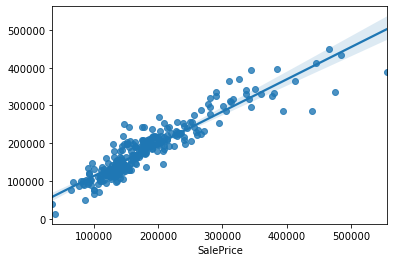

In [71]:
sns.regplot(y_test,predictions)
plt.savefig('images/regresionPlot.png')

In [72]:
#_Regression Results

In [73]:

X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     139.5
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:18:03   Log-Likelihood:                -13850.
No. Observations:                1168   AIC:                         2.777e+04
Df Residuals:                    1131   BIC:                         2.796e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -5.05e+05 

# Load From Pickle

In [86]:
train_all = pd.read_pickle('data/train_raw.pkl')
features=['Neighborhood', 'SalePrice','OverallQual', 'Heating',
            'BsmtQual', 'HouseStyle', 'KitchenQual', 'YearBuilt',
 'TotRmsAbvGrd', 'OverallCond']
x_feat = train_all


x_feat_Neigh = x_feat.loc[x_feat['Neighborhood'].isin(keep_)].reset_index()#['NAmes', 'OldTown'])]#'NAmes']
x_feat_Neigh

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
1,8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
2,9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
3,10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
4,12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
677,1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
678,1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
679,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,

In [74]:
if not skip_run:
    X=x_feat_Neigh[['Neighborhood', 'BedroomAbvGr', 'Heating',
                'BsmtQual', 'HouseStyle', 'KitchenAbvGr', '1stFlrSF',
     'TotRmsAbvGrd', 'OverallCond']]
    Y = x_feat_Neigh['SalePrice']
    X = pd.get_dummies(data=X, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=22)
    model = LinearRegression()
    model.fit(X_train,y_train)

    coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
    predictions = model.predict(X_test)
    sns.regplot(y_test,predictions)
    X_train_Sm= sm.add_constant(X_train)
    X_train_Sm= sm.add_constant(X_train)
    ls=sm.OLS(y_train,X_train_Sm).fit()
    print(ls.summary())

In [87]:
train_all = pd.read_pickle('data/train_raw.pkl')
features=['SalePrice','OverallQual', 'Heating',
            'BsmtQual', 'HouseStyle', 'KitchenQual', 'YearBuilt',
 'TotRmsAbvGrd', 'OverallCond']
x_feat = train_all

(array([ 22., 109., 333., 337., 261., 153.,  87.,  53.,  46.,  18.,  17.,
         10.,   4.,   2.,   1.,   3.,   1.,   1.,   0.,   0.,   2.]),
 array([ 34900.        ,  69190.47619048, 103480.95238095, 137771.42857143,
        172061.9047619 , 206352.38095238, 240642.85714286, 274933.33333333,
        309223.80952381, 343514.28571429, 377804.76190476, 412095.23809524,
        446385.71428571, 480676.19047619, 514966.66666667, 549257.14285714,
        583547.61904762, 617838.0952381 , 652128.57142857, 686419.04761905,
        720709.52380952, 755000.        ]),
 <BarContainer object of 21 artists>)

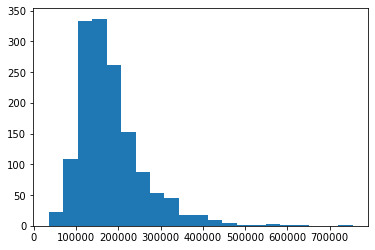

In [88]:
plt.hist(x_feat['SalePrice'], bins = 21)

Text(0.5, 1.0, 'Density Plot of Sale Price by Neighborhood')

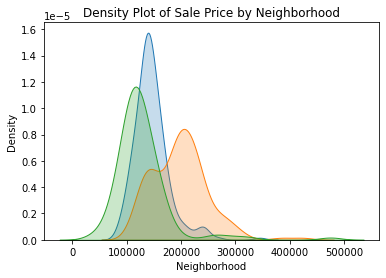

In [77]:
#import seaborn as sns
# Make one plot for each different location
sns.kdeplot(x_feat.loc[x_feat['Neighborhood'] == 'NAmes', 'SalePrice'], 
            label = 'North Ames', shade = True)
sns.kdeplot(x_feat.loc[x_feat['Neighborhood'] == 'CollgCr', 'SalePrice'], 
            label = 'College Creek', shade = True)
sns.kdeplot(x_feat.loc[x_feat['Neighborhood'] == 'OldTown', 'SalePrice'], 
            label = 'Old Town', shade = True)
# Add labeling
plt.xlabel('Neighborhood')
plt.ylabel('Density')
plt.title('Density Plot of Sale Price by Neighborhood')

# A bunch of Density plots

In [78]:
if not skip_run:
    # Make one plot for each different location
    for neigh_ in x_feat['Neighborhood'].unique():
        if neigh_ not in keep_:
            print(neigh_, (x_feat.loc[x_feat['Neighborhood']==neigh_].shape[0]))
            sns.kdeplot(x_feat.loc[x_feat['Neighborhood'].isin(keep_), 'SalePrice'], 
                    label = "The Focus-Hoods", shade = True)
            sns.kdeplot(x_feat.loc[x_feat['Neighborhood'] == neigh_, 'SalePrice'], 
                    label = neigh_, shade = True)
            # Add labeling
            file_name_ = 'images/Density_plot_' + neigh_ + '.png'
            plt.xlabel('Neighborhood')
            plt.ylabel('Density')
            plt.title('Density Plot of Sale Price by Neighborhood')
            plt.savefig(file_name_)
            plt.show()



In [89]:
feat_to_keep = ['TotRmsAbvGrd', 'MasVnrType', 'GarageType', 
                'GarageFinish', 'Fireplaces', 'OverallQual', 
                'GrLivArea', 'Heating', 'GarageCars', 
                'FullBath','Neighborhood']

In [ ]:
X=x_feat_Neigh[feat_to_keep]
Y = x_feat_Neigh['SalePrice']
X = pd.get_dummies(data=X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
model = LinearRegression()
model.fit(X_train,y_train)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
predictions = model.predict(X_test)
sns.regplot(y_test,predictions)
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

In [90]:
feat_to_keep = ['TotRmsAbvGrd',#, 'MasVnrType',# 'GarageType', 'FullBath',
                'Fireplaces', 'OverallQual', 
                'GrLivArea', 'GarageCars', 
                'Neighborhood']

In [91]:
def lr_model(df, neigh_, feat_keep):
    X=df.loc[df['Neighborhood'].isin(neigh_)][feat_keep]
    Y = df.loc[df['Neighborhood'].isin(neigh_)]['SalePrice']
    X = pd.get_dummies(data=X, drop_first=True)
    #X = X.drop(['GarageType_CarPort', 'GarageFinish_RFn', 'Heating_GasA'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
    
    model = LinearRegression()
    model.fit(X_train,y_train)

    coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
    predictions = model.predict(X_test)
    sns.regplot(y_test,predictions)
    X_train_Sm= sm.add_constant(X_train)
    X_train_Sm= sm.add_constant(X_train)
    ls=sm.OLS(y_train,X_train_Sm).fit()
    print(ls.summary())
    return X_train.sort_values('OverallQual'), model

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     72.52
Date:                Thu, 17 Dec 2020   Prob (F-statistic):          1.41e-103
Time:                        12:08:18   Log-Likelihood:                -6286.2
No. Observations:                 544   AIC:                         1.260e+04
Df Residuals:                     531   BIC:                         1.265e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4895.2340 

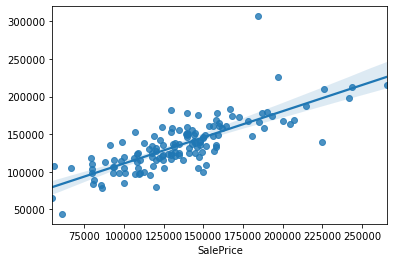

In [92]:

x_vals, mod_ = lr_model(x_feat, keep_, feat_to_keep)

In [93]:
new_vals = x_vals.loc[(x_vals['OverallQual']<=4)]# or x_vals['OverallQual']==3)]
result = train_all.iloc[list(new_vals
                                 .index
                                 .values
                                 .tolist())][['Neighborhood', 'OverallQual', 'SalePrice']]
#train_all.iloc[train_all.loc[new_vals]]
for qual_ in [7,8,9]: 
    field_ = '_Est_Price_qual_' + str(qual_)
    new_vals['OverallQual']= qual_
    y_vals = mod_.predict(new_vals)
#     result = train_all.iloc[list(new_vals
#                                  .index
#                                  .values
#                                  .tolist())][['SalePrice', 'Neighborhood']]
    result['_Est_Price_qual_' + str(qual_)]=y_vals.round(-3).astype('int64')

In [54]:
x_vals

,TotRmsAbvGrd,Fireplaces,OverallQual,GrLivArea,GarageCars,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer
533,2,0,1,334,0,0,0,0,0,0,0,0
1100,3,0,2,438,1,0,0,0,0,0,1,0
916,4,0,2,480,1,0,1,0,0,0,0,0
636,4,1,2,800,0,0,0,0,0,0,0,0
323,6,0,3,1163,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
458,7,1,8,1666,1,0,0,0,0,1,0,0
724,8,1,9,1698,3,1,0,0,0,0,0,0
583,9,1,10,2775,2,0,0,0,0,1,0,0
1298,12,3,10,5642,2,1,0,0,0,0,0,0


In [ ]:
ls.pvalues

In [ ]:
feat_to_keep = ['TotRmsAbvGrd',# 'GarageType', 
                'OverallQual', 
                'GrLivArea',  
                'Neighborhood']

feat_to_keep = ['TotRmsAbvGrd', 'GarageType', 
                'GarageFinish', 'Fireplaces', 'OverallQual', 
                'GrLivArea', 'Heating', 'GarageCars', 
                'Neighborhood']

lr_model(x_feat, keep_, feat_to_keep)

In [55]:
#Backward Elimination
X=pd.read_pickle('data/train_x.pkl')

y=pd.read_pickle('data/train_y.pkl')
X = pd.get_dummies(data=X, drop_first=True)
cols = list(X.columns)
pmax = 1

while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.215):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotArea_(12799.667, 215245.0]', 'LotArea_(1299.999, 6405.0]', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_2fmCon', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin', 'OverallQual_10', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallCond_3', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'YearBuilt_(1940.0, 1960.0]', 'YearBuilt_(1960.0, 1973.0]', 'YearBuilt_(1973.0, 1994.0]', 'YearBuilt_(1994.0, 2004.0]', 'YearBuilt_(2004.0, 2010.0]', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Gd', 'ExterQual_TA

In [ ]:
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 25)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
#no of features
nof_list=np.arange(1,200)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

In [ ]:
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
X=pd.read_pickle('data/train_x.pkl')

y=pd.read_pickle('data/train_y.pkl')
X = pd.get_dummies(data=X, drop_first=True)


from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

# Feature Importance From Lasso

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 10.0)
imp_coef[-imp_coef.between(-.4,.75)].plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.savefig('images/feature_importance.png')

In [ ]:
imp_coef[-imp_coef.between(-.4,.4)]

# Images

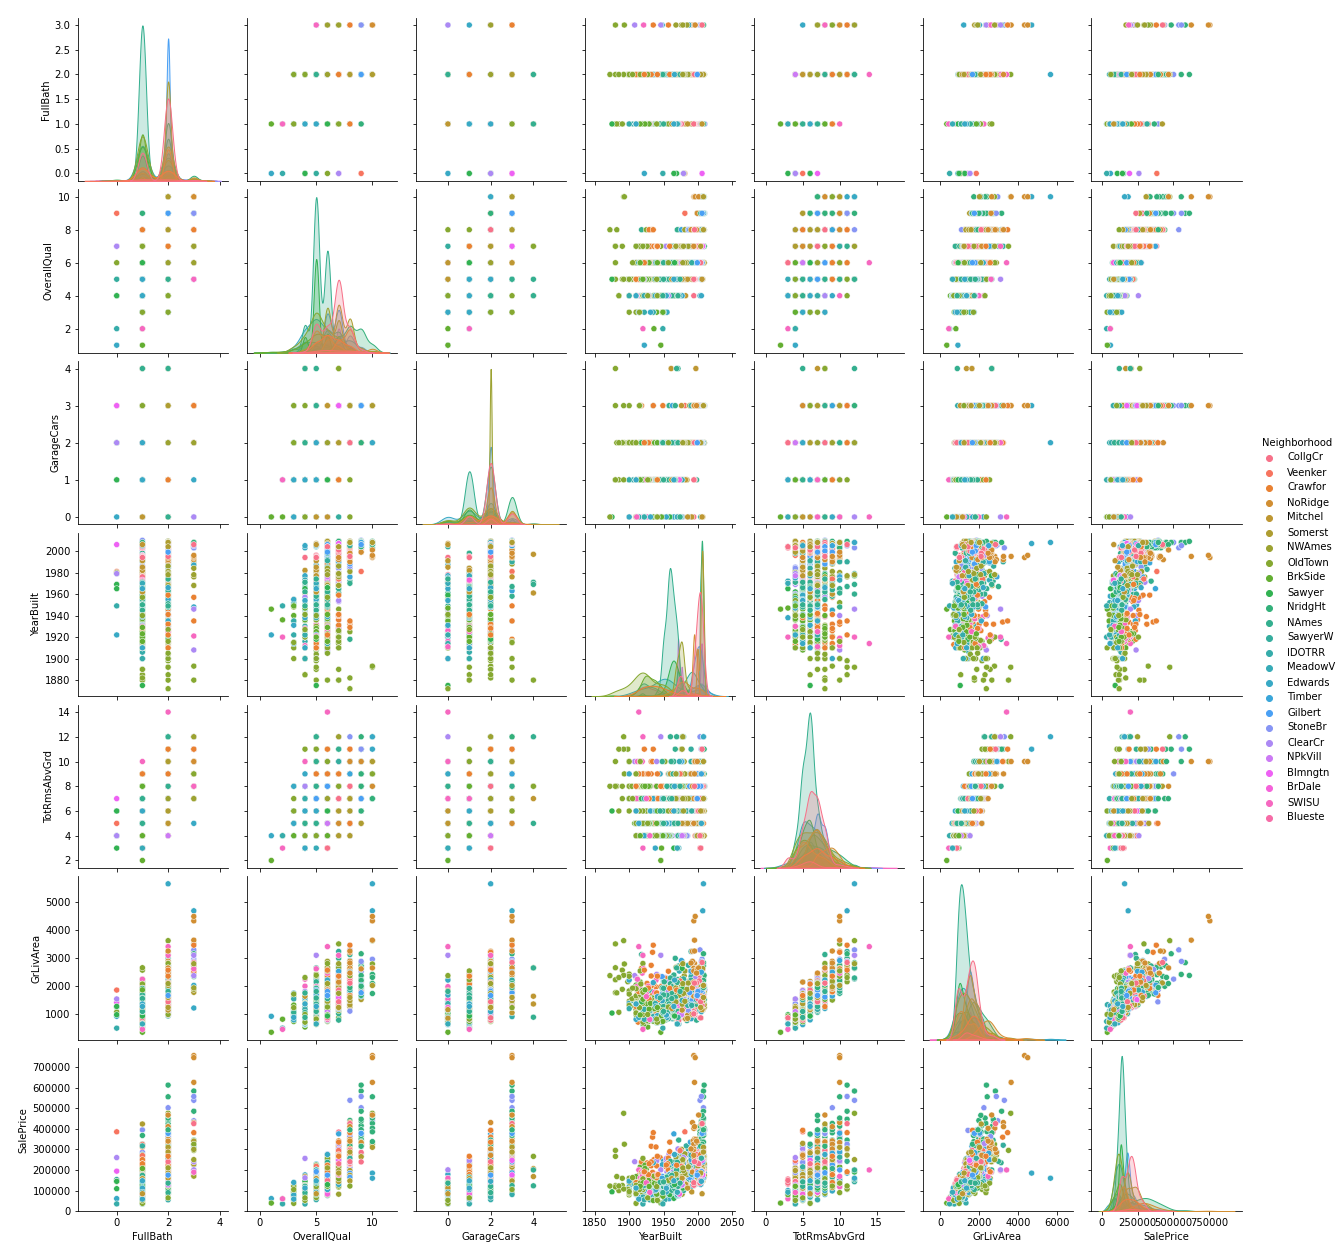

In [94]:
Image('images/pair_plot_sns.png')

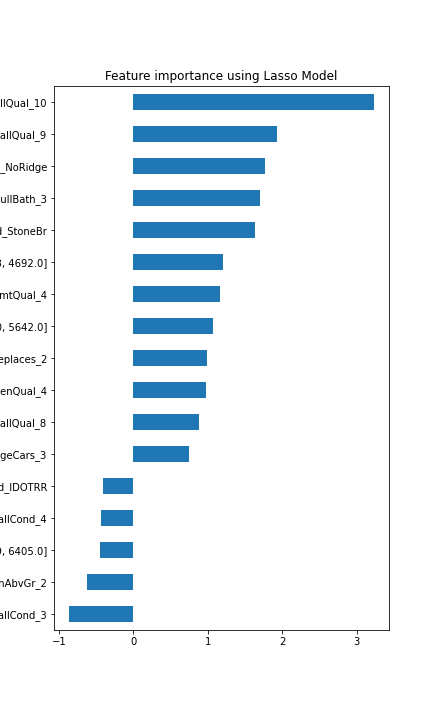

In [95]:
Image('images/feature_importance.png')

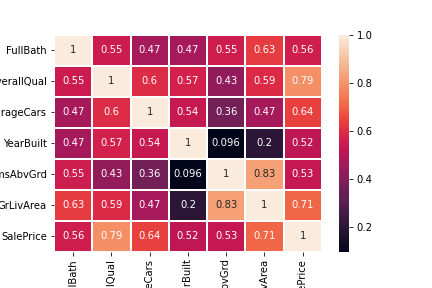

In [96]:
Image('images/feat_corr.png')

# Neighborhoods by Quality

In [97]:
train_all = pd.read_pickle('data/train_raw.pkl')
keep_w_All = keep_.copy()
keep_w_All.append('ALL')
@interact
def show_neighborhoods(Neighborhood=keep_w_All, OverallQual=(0,10,1)):
    new_vals = x_vals.loc[(x_vals['OverallQual']==OverallQual)]
    result = train_all.iloc[list(new_vals
                                 .index
                                 .values
                                 .tolist())][['Neighborhood', 'YearBuilt', 
                                              'OverallQual', 'SalePrice']]
    for qual_ in [8,9,10]: 
        field_ = 'Est_Price_Q' + str(qual_)
        new_vals['OverallQual']= qual_
        y_vals = mod_.predict(new_vals)
        result[field_]=y_vals.round(-3).astype('int64')
    if Neighborhood != 'ALL':
        return result.loc[(result['Neighborhood']==Neighborhood)]
    else:
        return result
    





interactive(children=(Dropdown(description='Neighborhood', options=('NAmes', 'OldTown', 'Sawyer', 'BrkSide', '…

In [98]:
columns_show = ['Neighborhood', 'YearBuilt', 'OverallQual', 'SalePrice']
df=train_all
all_neighborhoods = df.Neighborhood.unique()
def show_neighborhoods_by_neigh(Neighborhood):
    return(df.loc[df['Neighborhood']==Neighborhood][columns_show])
    
stats = interact(show_neighborhoods_by_neigh,
                Neighborhood=widgets.Dropdown(options=all_neighborhoods))

interactive(children=(Dropdown(description='Neighborhood', options=('CollgCr', 'Veenker', 'Crawfor', 'NoRidge'…

In [99]:

# Make plots that are selectable based on plot_ and neigh_ selected

def plot_out(plot_, df_, neigh_):
    if plot_ == 'density':
        sns.kdeplot(df_['SalePrice'], 
                label = "All The Hoods", shade = True)
        sns.kdeplot(df_.loc[df_['Neighborhood'] == neigh_, 'SalePrice'], 
                label = neigh_, shade = True)
        
        file_name_ = 'images/Density_plot_' + neigh_ + '.png'
        plt.xlabel('Neighborhood')
        plt.ylabel('Density')
        plt.title('Density Plot of Sale Price by Neighborhood')

    if plot_ == 'box':
        sns.boxplot(y='SalePrice', 
                    x='Neighborhood', 
                    data=df_.loc[df_['Neighborhood']==neigh_])
        
    if plot_ == 'violin':
        sns.violinplot(y='SalePrice', 
                    x='Neighborhood', hue='OverallQual', 
                    data=df_.loc[df_['Neighborhood']==neigh_],
                    inner='quart')
        
    if plot_ == 'hist':
        sns.distplot(df_.loc[df_['Neighborhood']==neigh_]['SalePrice'])
    plt.show()   

# Show Interactive Plot Selector

<a name='graph' />

In [100]:
TheHood = widgets.Dropdown(options=all_neighborhoods)
Field = widgets.Dropdown(options=['density', 'box', 'violin', 'hist'])
sns.set(rc={'figure.figsize':(12,8)})
ui = widgets.HBox([TheHood, Field])
def f(TheHood, Field):
    mean_ = round(int(df.loc[df['Neighborhood']==TheHood]['SalePrice'].mean()),-3)
    count_ = (df.loc[df['Neighborhood']==TheHood]['SalePrice'].count())
    print('Neighborhood : ', TheHood)
    print('Count : ', count_)
    print('Mean : ', mean_)
    plot_out(Field, df, TheHood)
    
out = widgets.interactive_output(f, {'TheHood': TheHood, 'Field': Field})

display(ui, out)

Output()